# Prosjektoppgave i PY1010

## Oppgave support dashboard

Analyser av data som er loggført for supportavdelingen ved telefonselskapet MORSE.

Filen 'support_uke_24.xlsx' Kolonne 1: Ukedag henvendelsen fant sted Kolonne 2: Klokkeslett kunden tok kontakt med supportavdelingen Kolonne 3: Samtalens varighet Kolonne 4: Kundens tilfredshet (skala fra 1-10 hvor 1 indikerer svært misfornøyd og 10 indikerer svært fornøyd).


### Del a) 

Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1 i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’, data i kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’. 
Merk: filen ‘support_uke_24.xlsx’ må ligge i samme mappe som Python-programmet ditt.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#les inn excel-fil
data = pd.read_excel("support_uke_24.xlsx")

#lagrer data fra excel-fil i kolonner
u_dag = data['Ukedag'].values
kl_slett = data['Klokkeslett'].values
varighet = data['Varighet'].values
score = data['Tilfredshet'].values

#skriv ut for å verifisere
#print("u_dag:", u_dag)
#print("kl_slett:", kl_slett)
#print("varighet:", varighet)
#print("score:", score)

### Del b) 

Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet visualiseres ved bruk av et søylediagram (stolpediagram)

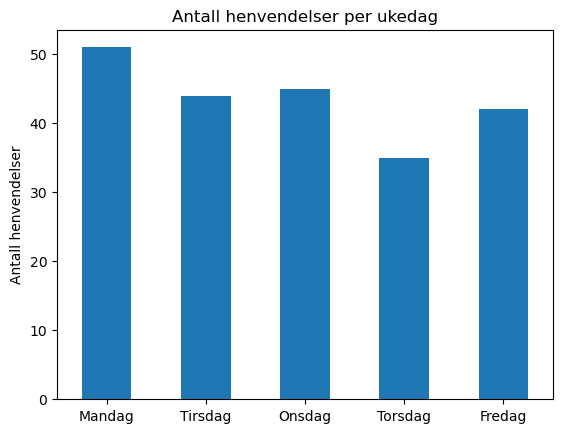

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#les inn excel-fil
data = pd.read_excel("support_uke_24.xlsx")

#lagrer data fra excel-fil i kolonner
u_dag = data['Ukedag'].values
kl_slett = data['Klokkeslett'].values
varighet = data['Varighet'].values
score = data['Tilfredshet'].values

#teller antall henvendelser per ukedag
henvendelse_per_ukedag = data['Ukedag'].value_counts().reindex(['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag'])

#viser resultat i søylediagram
henvendelse_per_ukedag.plot(kind='bar')


#vis søylediagrammet, legg til tittel og label, fjern label, roter label
plt.title('Antall henvendelser per ukedag')
plt.ylabel('Antall henvendelser')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()


### Del c)

Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24. Svaret skrives til skjerm med informativ tekst.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#les inn excel-fil
data = pd.read_excel("support_uke_24.xlsx")

#lagrer data fra excel-fil i kolonner
u_dag = data['Ukedag'].values
kl_slett = data['Klokkeslett'].values
varighet = data['Varighet'].values
score = data['Tilfredshet'].values

#beregner minste og lengste samtaletid
minste_samtaletid = data["Varighet"].min()
lengste_samtaletid = data["Varighet"].max()

print("Av henvendelsene som er loggført for uke 24 er minste samtaletid", minste_samtaletid, "og lengste samtaletid er", lengste_samtaletid)

Av henvendelsene som er loggført for uke 24 er minste samtaletid 00:00:59 og lengste samtaletid er 00:11:28


### Del d)

Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle henvendelser i uke 24.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#les inn excel-fil
data = pd.read_excel("support_uke_24.xlsx")

#funksjon som omgjør samtaletid til sekunder
def func_tid_til_sekunder(tid):
    hh, mm, ss = map(int, tid.split(":"))
    return hh * 3600 + mm * 60 + ss

#funksjon som omgjør fra sekunder tilbake til hh:mm:ss 
def func_sekunder_til_tid(sekunder):
    hh = sekunder // 3600
    mm = (sekunder % 3600) // 60
    ss = sekunder % 60
    return hh, mm, ss

#hvis varighet er lagret som hh:mm:ss, konverter til sekunder
if data['Varighet'].dtype == 'object':  
    data['Varighet'] = data['Varighet'].apply(func_tid_til_sekunder)

#beregn gjennomsnittlig samtaletid
gj_snitt_varighet = data['Varighet'].mean()

#hvis resultat er lagret som sekunder, konverter til hh:mm:ss
if isinstance(gj_snitt_varighet, float):
    gj_snitt_varighet_endret = func_sekunder_til_tid(int(gj_snitt_varighet))
    time, minutt, sekund = gj_snitt_varighet_endret

#vis resultatet
print("Gjennomsnittlig samtaletid for alle henvendelser i uke 24:", int(gj_snitt_varighet), "sekunder eller " f"{(time):02}:{(minutt):02}:{(sekund):02}")


Gjennomsnittlig samtaletid for alle henvendelser i uke 24: 400 sekunder eller 00:06:40


### Del e)

Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl 14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved bruk av et sektordiagram (kakediagram).

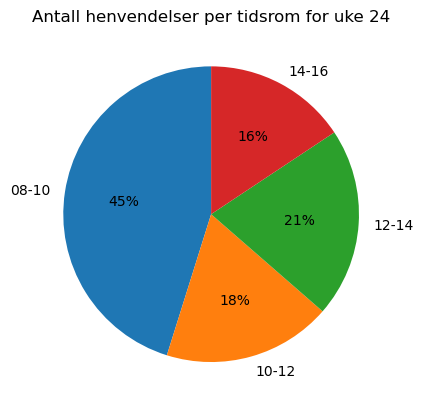

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#les inn excel-fil
data = pd.read_excel("support_uke_24.xlsx")

#funksjon for å finne hvilket tidsrom et klokkeslett er
def func_finne_tidsrom(tid):
    hh, mm = map(int, tid.split(":")[:2])  #henter timer og min
    if 8 <= hh < 10:  #finner forekomster mellom kl 08-10
        return "08-10"
    elif 10 <= hh < 12:  #finner forekomster mellom kl 10-12
        return "10-12"
    elif 12 <= hh < 14:   #finner forekomster mellom kl 12-14
        return "12-14"
    elif 14 <= hh < 16:   #finner forekomster mellom kl 14-16
        return "14-16"
 
#sorterer henvendelser i tidsrom
data['Tidsrom'] = data['Klokkeslett'].astype(str).apply(func_finne_tidsrom)

#teller antall henvendelser per tidsrom
henvendelser_per_tidsrom = data['Tidsrom'].value_counts().reindex(['08-10', '10-12', '12-14', '14-16'])

#plotter sektordiagram
henvendelser_per_tidsrom.plot(kind='pie', autopct='%1.0f%%', startangle = 90)

#vis sektordiagrammet, legg til tittel, fjern label
plt.title("Antall henvendelser per tidsrom for uke 24")
plt.ylabel('')
plt.show()

### Del f)

Kundens tilfredshet loggføres som tall fra 1-10 hvor 1 indikerer svært misfornøyd og 10 indikerer svært fornøyd. Disse tilbakemeldingene skal så overføres til NPS-systemet (Net Promoter Score).az

NPS-systemet er konstruert på følgende måte: Score 1-6 oppfattes som at kunden er negativ (vil trolig ikke anbefale MORSE til andre). Score 7-8 oppfattes som et nøytralt svar. Score 9-10 oppfattes som at kunden er positiv (vil trolig anbefale MORSE til andre).

Supportavdelingens NPS beregnes som et tall, prosentandelen positive kunder minus prosentandelen negative kunder. Ved en formel kan dette gis slik:

NPS = % positive kunder - % negative kunder

<img src="NPS.png" alt="Mitt diagram" width="500">

Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk: Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#les inn excel-fil
data = pd.read_excel("support_uke_24.xlsx")

#fjerner rader der en bestent kolonne har NaN-verdier, utelater kunder som ikke har gitt tilbakemelding
rader_med_verdi = data.dropna(subset=['Tilfredshet'])

#teller negative og positive kunder
negative = rader_med_verdi[rader_med_verdi['Tilfredshet'] <= 6]
positive = rader_med_verdi[rader_med_verdi['Tilfredshet'] >= 9]

#teller totalt antall rader/kunder som har gitt tilfredshet-score
totalt_ant = rader_med_verdi.shape[0]
#print(totalt_ant)

#regner ut prosent positive kunder
prosent_positive = (positive.shape[0] / totalt_ant) * 100
#print(prosent_positive)

#regner ut prosent negative kunder
prosent_negative = (negative.shape[0] / totalt_ant) *100
#print(prosent_negative)

#regner ut NPS som er positive minus negative
NPS = prosent_positive - prosent_negative
print(f"Supportavdelingens NPS er: {NPS:.1f}")

Supportavdelingens NPS er: 41.9
